# Compartment Model

Pharmacokinetic models are essential tools for understanding how drugs move through the body. One common approach is the compartment model, which divides the body into compartments where drugs are absorbed, distributed, metabolized, and eliminated.

## Background

A compartment model simplifies the complex processes of drug distribution and elimination by grouping tissues and organs with similar drug kinetics into compartments. The most basic compartment models are:

- **One-Compartment Model:** Assumes the body is a single homogeneous unit where the drug distributes instantaneously.
- **Two-Compartment Model:** Divides the body into a central compartment (e.g., blood and highly perfused organs) and a peripheral compartment (e.g., muscle and fat tissues).
- **Multi-Compartment Models:** Include more compartments to capture more complex drug kinetics.

In this section, we will implement a simple compartment model consisting of absorption, elimination, and metabolization processes.

## Relevance

Compartment models are highly relevant in pharmacokinetics for several reasons:
- **Drug Development:** They help in predicting how new drugs behave in the body, guiding dosage form design and therapeutic regimens.
- **Therapeutic Drug Monitoring:** Models aid in adjusting doses for individual patients to achieve optimal therapeutic levels.
- **Understanding Drug Interactions:** They provide insights into how drugs interact with each other and with biological systems, influencing metabolism and elimination.

## Simple Compartment Model

### Components of the Model

1. **Absorption:** The process by which a drug enters the bloodstream from the site of administration (e.g., oral, intravenous).
2. **Elimination:** The removal of the drug from the body, primarily through metabolic conversion and excretion.
3. **Metabolization:** The chemical transformation of the drug into metabolites, which may be active or inactive.

![Compartment Model](03_compartment_model.png)

# Implementation of the compartment model
Now we implement the ordinary differential equation system corresponding to the processes and compartments depicted above. We can simulate the model with `odeint`.

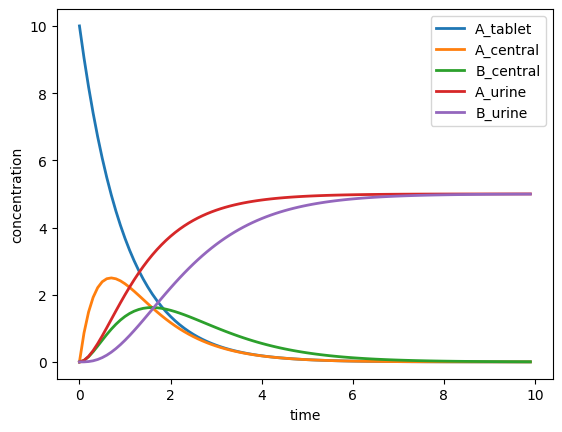

In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pylab as plt

def dydt_compartment_model(x, t, ka, km, ke):
    """
    System of ODEs of the compartment model.
    """
    # state variables
    A_tablet = x[0]
    A_central = x[1]
    B_central = x[2]
    A_urine = x[3]
    B_urine = x[4]
    
    # rates
    va = ka * A_tablet
    vm = km * A_central
    vuA = ke * A_central
    vuB = ke * B_central

    # odes (stoichiometric equation)    
    return [
        -va,             # dA_tablet/dt
         va - vm - vuA,  # dA_central/dt
         vm - vuB,       # dB_central/dt
         vuA,            # dA_urine/dt
         vuB,            # dB_urine/dt
    ] 


# initial condition and time span
t = np.arange(0, 10, 0.1)  # [hr]
Dose_A = 10.0  # [mg]
x0 = [
    Dose_A,  # A_tablet
    0.0,   # A_central
    0.0,   # B_central
    0.0,   # A_urine
    0.0,   # B_urine
]

# parameters
ka = 1.0
km = 1.0
ke = 1.0

x = odeint(dydt_compartment_model, x0, t, args=(ka, km, ke))
names = ["A_tablet", "A_central", "B_central", "A_urine", "B_urine"]

f, ax = plt.subplots(nrows=1, ncols=1)
for k, name in enumerate(names):
    ax.plot(t, x[:, k], linewidth=2, label=name)

ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("concentration")

plt.show()

## Insights and What We Learned

- **Compartmental Representation:** By dividing the body into compartments, we can model complex drug kinetics in a manageable way.
- **Absorption, Metabolization, and Elimination:** Understanding these processes helps in predicting drug behavior and designing effective dosing regimens.
- **Numerical Solutions:** Using numerical methods like `odeint` allows us to solve complex systems of ODEs that do not have straightforward analytical solutions.

This exercise provides a practical foundation in modeling drug kinetics using compartment models, which are crucial for various applications in pharmacology and medicine.


# The Effect of Metabolism on Urinary Recoveries

We are interested in understanding how the metabolic rate affects the amounts of drug A and its metabolite B recovered in the urine. Specifically, we will systematically alter the parameter for the metabolization rate \(k_m\), which determines the conversion from A to B (\(A \rightarrow B\)).

## Background

In pharmacokinetics, the metabolism of a drug can significantly influence its pharmacological effects and the duration of its action. Metabolites can be either active or inactive, and their formation and elimination are crucial in determining the overall drug effect and safety profile. The rate of metabolism, represented by the rate constant \(k_m\), plays a key role in these processes.

## Relevance

Understanding the effect of metabolism on urinary recoveries is important for several reasons:
- **Drug Efficacy and Safety:** The rate at which a drug is metabolized can affect its therapeutic efficacy and the risk of side effects.
- **Dosing Regimens:** Adjustments to dosing regimens may be necessary based on metabolic rates to achieve optimal drug levels.
- **Interindividual Variability:** Differences in metabolic rates among individuals can lead to variations in drug response and require personalized medicine approaches.

## Systematic Parameter Scan

We will systematically alter the metabolization rate $k_m$ to observe its effect on the amounts of A and B recovered in the urine. The range of $k_m$ values will be chosen to cover a broad spectrum of metabolic rates, from slow to fast metabolism.

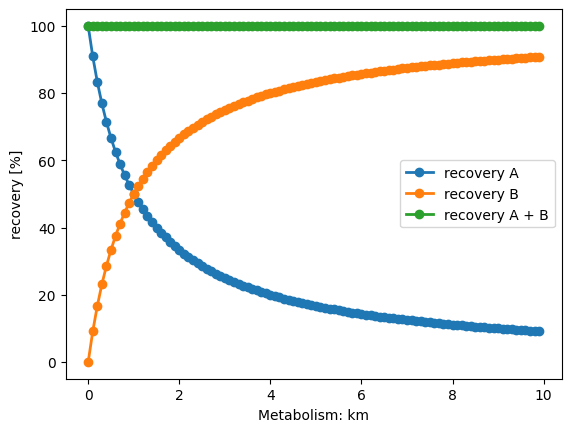

In [2]:
t = np.arange(0, 20, 0.1)  # [hr]
kms = np.arange(0, 10, 0.1)
A_recovery = np.zeros_like(kms)
B_recovery = np.zeros_like(kms)

for k, km_new in enumerate(kms):
    x = odeint(dydt_compartment_model, x0, t, args=(ka, km_new, ke))
    A_recovery[k] = x[-1, 3]  # A_urine(end)
    B_recovery[k] = x[-1, 4]  # B_urine(end)

A_recovery = A_recovery/Dose_A
B_recovery = B_recovery/Dose_A

f, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(kms, A_recovery * 100, linewidth=2, label="recovery A", marker="o")
ax.plot(kms, B_recovery * 100, linewidth=2, label="recovery B", marker="o")
ax.plot(kms, (A_recovery + B_recovery) * 100, linewidth=2, label="recovery A + B", marker="o")
ax.legend()
ax.set_xlabel("Metabolism: km")
ax.set_ylabel("recovery [%]")

plt.show()

## Insights and What We Learned

- **Metabolism Rate Impact:** The rate of metabolism (\(k_m\)) significantly influences the amounts of the parent drug and its metabolite recovered in the urine.
- **Urinary Recovery Patterns:** By varying \(k_m\), we can observe how faster metabolism leads to higher levels of metabolite B and lower levels of drug A in the urine, and vice versa.
- **Clinical Implications:** Understanding these patterns is crucial for dose adjustment and optimizing therapeutic outcomes, especially for drugs with active metabolites.

Through this exercise, we gain valuable insights into the dynamic interplay between drug metabolism and elimination, enhancing our ability to predict drug behavior and tailor treatments to individual patient needs.

**Exercise**: Does the absorption rate of A have an effect on the urinary recovery of B?